# 1. Wire

At **low frequencies**, the resistance of a wire is given by the constant DC resistance:

$$
R_{DC} = \frac{l}{\sigma \cdot \pi r^2}
$$

Where:
- **$ L_g $**: Length of the wire in meters (m)
- **$ \sigma $**: Electrical conductivity of the material in Siemens per meter (S/m)
- **$ r $**: Radius of the wire in meters (m)

As **frequency increases**, the resistance of a wire also changes. This variation occurs because the current is forced toward the outer surface of the conductor due to the **Skin Effect**. The **skin depth** ($ \delta $) represents the effective thickness of the layer through which current flows. At higher frequencies, the center of the conductor carries almost no current. 

The skin depth is defined as:

$$
\delta = \frac{1}{\sqrt{\pi f \mu \sigma}}
$$

Where:
- **$ \delta $**: Skin depth (in meters, m), the effective thickness of the layer where current flows in the conductor.
- **$ f $**: Frequency of the signal (in Hz).
- **$ \mu $**: Permeability of the material (in Henries per meter, H/m).
- **$ \sigma $**: Electrical conductivity of the material (in Siemens per meter, S/m).

Therefore, the **AC resistance** can be expressed intuitively by considering the effective area ($ A_{\text{eff}} $) where current flows:

$$
R_{AC} = \frac{l}{\sigma \cdot A_{\text{eff}}} \approx \frac{L_g}{\sigma \cdot (2 \pi r \cdot \delta)}
$$

Where:
- **$ l $**: Length of the wire (in meters, m)
- **$ R $**: Radius of the wire (in meters, m)
- **$ \sigma $**: Electrical conductivity (in Siemens per meter, S/m)
- **$\delta $**: Skin depth (in meters, m)

Additionally, the **total self-inductance** of a wire consists of both external inductance (due to magnetic fields outside the conductor) and internal inductance (due to magnetic fields inside the conductor). For a straight wire, the total inductance can be approximated using the following formula:

$$
L = 0.002 \cdot l \left[ 2.3 \log \left( \frac{4l}{d} \right) - 0.75 \right] \, \mu\text{H}
$$

Where:
- **$ L $**: Inductance (in microhenries, $ \mu\text{H} $)
- **$ l $**: Length of the wire (in centimeters, cm)
- **$ d $**: Diameter of the wire (in centimeters, cm)


As a reference, here you can find the resistivity and coductivity of some typical materials:

| Material   | Resistivity ρ (Ω⋅m) | Conductivity σ (S/m) | Applications in RF                              |
|------------|---------------------|----------------------|------------------------------------------------|
| Silver     | 1.59×10⁻⁸           | 6.30×10⁷             | High-Q filters, plating for connectors         |
| Copper     | 1.68×10⁻⁸           | 5.96×10⁷             | Standard traces, cables, inductors             |
| Gold       | 2.44×10⁻⁸           | 4.10×10⁷             | Bond wires, corrosion-resistant plating        |
| Aluminum   | 2.65×10⁻⁸           | 3.77×10⁷             | Power lines, chassis shielding                 |
| Tungsten   | 5.60×10⁻⁸           | 1.79×10⁷             | High-temperature filaments                     |
| Iron       | 9.71×10⁻⁸           | 1.03×10⁷             | Magnetic cores (high loss at RF)               |
| Nichrome   | 1.10×10⁻⁶           | 9.09×10⁵             | Heating elements, thin-film resistors          |

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider, FloatLogSlider, HBox, VBox, Layout, interactive_output
from IPython.display import display

def compare_wire_physics(L1, sigma1, r1, L2, sigma2, r2, L3, L4, f_curs, d_curs):
    mu_0 = 4 * np.pi * 1e-7
    freq = np.logspace(5, 10, 500)
    diam_cm_axis = np.linspace(0.01,0.2, 500) # 1mm to 20mm
    
    # --- Calculations ---
    def calc_r(L, sigma, R, f):
        delta = 1 / np.sqrt(np.pi * f * mu_0 * sigma)
        r_dc = L / (sigma * np.pi * R**2)
        r_ac = L / (sigma * (2 * np.pi * R * delta))
        return np.maximum(r_dc, r_ac)

    def calc_l_nH(l_cm, d_cm):
        # Eq 1-1: Result in uH converted to nH (*1000)
        uH = 0.002 * l_cm * (2.3 * np.log10((4 * l_cm) / d_cm) - 0.75)
        return uH * 1000

    # Curve Data - Fixed R1/R2 to r1/r2
    res1 = calc_r(L1, sigma1, r1, freq)
    res2 = calc_r(L2, sigma2, r2, freq)
    ind1 = calc_l_nH(L3, diam_cm_axis)
    ind2 = calc_l_nH(L4, diam_cm_axis)

    # Cursor Intersection Points - Fixed R1/R2 to r1/r2
    y_r1 = calc_r(L1, sigma1, r1, f_curs)
    y_r2 = calc_r(L2, sigma2, r2, f_curs)
    y_l1 = calc_l_nH(L3, d_curs)
    y_l2 = calc_l_nH(L4, d_curs)

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

    # --- Plot 1: Resistance ---
    ax1.loglog(freq, res1, lw=2, color='royalblue', label=fr'Case 1 ($l={L1}$m)')
    ax1.loglog(freq, res2, lw=2, color='darkorange', ls='--', label=fr'Case 2 ($l={L2}$m)')
    
    # Vertical Red Cursor for Resistance
    ax1.axvline(f_curs, color='red', lw=1.5, ls='-', alpha=0.8)
    ax1.scatter([f_curs, f_curs], [y_r1, y_r2], color='red', zorder=5)
    
    ax1.set_title(fr'AC Resistance | Cursor: {f_curs:.1e} Hz' + '\n' + 
                  fr'Rac1: {y_r1:.2f} $\Omega$ | Rac2: {y_r2:.2f} $\Omega$', fontsize=11)
    ax1.set_xlabel('Frequency (Hz)')
    ax1.set_ylabel(r'Resistance ($\Omega$)')
    ax1.grid(True, which="both", alpha=0.3)
    ax1.legend(loc='upper left')

    # --- Plot 2: Inductance ---
    ax2.plot(diam_cm_axis, ind1, lw=2, color='royalblue', label=fr'Case 1 ($l={L3:.2f}$cm)')
    ax2.plot(diam_cm_axis, ind2, lw=2, color='darkorange', ls='--', label=fr'Case 2 ($l={L4:.2f}$cm)')
    
    # Vertical Red Cursor for Inductance
    ax2.axvline(d_curs, color='red', lw=1.5, ls='-', alpha=0.8)
    ax2.scatter([d_curs, d_curs], [y_l1, y_l2], color='red', zorder=5)
    
    ax2.set_title(f'Inductance (nH) | Cursor: {d_curs:.2f} cm' + '\n' + 
                  f'L1: {y_l1:.1f} nH | L2: {y_l2:.1f} nH', fontsize=11)
    ax2.set_xlabel('Diameter (cm)')
    ax2.set_ylabel('Inductance (nH)')
    ax2.grid(True, alpha=0.3)
    ax2.legend(loc='upper right')

    plt.tight_layout()
    plt.show()

# --- UI Layout ---
style = {'description_width': 'initial'}
wid = Layout(width='280px')

# Case 1 Parameters
L1_s = FloatSlider(value=100, min=1, max=500, step=1, description='l1 (m)', style=style, layout=wid)
s1_s = FloatLogSlider(value=5.98e7, base=10, min=4, max=8, step=0.1, description=r'$\sigma_1$ (S/m)', style=style, layout=wid)
R1_s = FloatSlider(value=0.0005, min=0.0001, max=0.005, step=0.0001, description='r1 (m)', readout_format='.4f', style=style, layout=wid)

# Case 2 Parameters
L2_s = FloatSlider(value=100, min=1, max=500, step=1, description='l2 (m)', style=style, layout=wid)
s2_s = FloatLogSlider(value=1.03e7, base=10, min=4, max=8, step=0.1, description=r'$\sigma_2$ (S/m)', style=style, layout=wid)
R2_s = FloatSlider(value=0.0010, min=0.0001, max=0.005, step=0.0001, description='r2 (m)', readout_format='.4f', style=style, layout=wid)

# Inductance Lengths (cm)
L3_s = FloatSlider(value=5.0, min=1, max=100, step=0.1, description='l3 (cm)', style=style, layout=wid)
L4_s = FloatSlider(value=10.0, min=1, max=100, step=0.1, description='l4 (cm)', style=style, layout=wid)

# Red Axis Cursor Controls
f_curs_s = FloatLogSlider(value=1e7, base=10, min=5, max=10, step=0.1, description='Freq Cursor', style=style, layout=wid)
d_curs_s = FloatSlider(value=0.06, min=0.01, max=0.2, step=0.01, description='Diam Cursor', style=style, layout=wid)

# Organization
controls = HBox([
    VBox([L1_s, s1_s, R1_s, f_curs_s]), 
    VBox([L2_s, s2_s, R2_s, d_curs_s]), 
    VBox([L3_s, L4_s])
])

out = interactive_output(compare_wire_physics, {
    'L1': L1_s, 'sigma1': s1_s, 'r1': R1_s, 'L2': L2_s, 'sigma2': s2_s, 'r2': R2_s, 
    'L3': L3_s, 'L4': L4_s, 'f_curs': f_curs_s, 'd_curs': d_curs_s
})

display(VBox([controls, out]))

# 2. Wirebound Resistor

Every physical resistor has "parasitics", or in other words, unintended electrical behaviors caused by its geometry. Your notebook models a resistor as a  **Parallel Resonant Circuit** based on these three components:

- **Ideal Resistance ($R$)**: The nominal value of the resistor (e.g., $10\text{ k}\Omega$).
- **Series Inductance ($L$)**: This comes from the magnetic field generated by the current flowing through the length of the component and its leads. It can be calculated with the previous formula.
- **Parallel Capacitance ($C$)**: This occurs due to the electric field between the two ends of the resistor or between turns if it is a wire-wound type.

The most critical part is the **Self-Resonant Frequency (SRF)**:

  $$
  f_{res} = \frac{1}{2\pi\sqrt{LC}}
  $$

  
Below **resonance**, where the inductive reactance ($X_L$) is much smaller than the resistance ($R$), the impedance is primarily dominated by the **resistance**, causing the impedance curve to remain flat. As the frequency **approaches resonance**, the energy begins oscillating between the **inductance** ($L$) and **capacitance** ($C$), and in a parallel configuration, their reactances start to cancel each other out. This results in an increase in the total impedance, reaching a peak at **resonance**. At **resonance** ($f_{res}$), the impedance reaches its maximum value, known as the **Self-Resonant Frequency** (SRF), where the inductive and capacitive reactances perfectly cancel each other out. Beyond **resonance**, the parasitic **capacitance** becomes the dominant factor, and as the frequency increases, the **capacitive reactance** ($X_C$) decreases. This causes the impedance to drop sharply, with the circuit behaving more like a **capacitor** than a **resistor**.


Output()

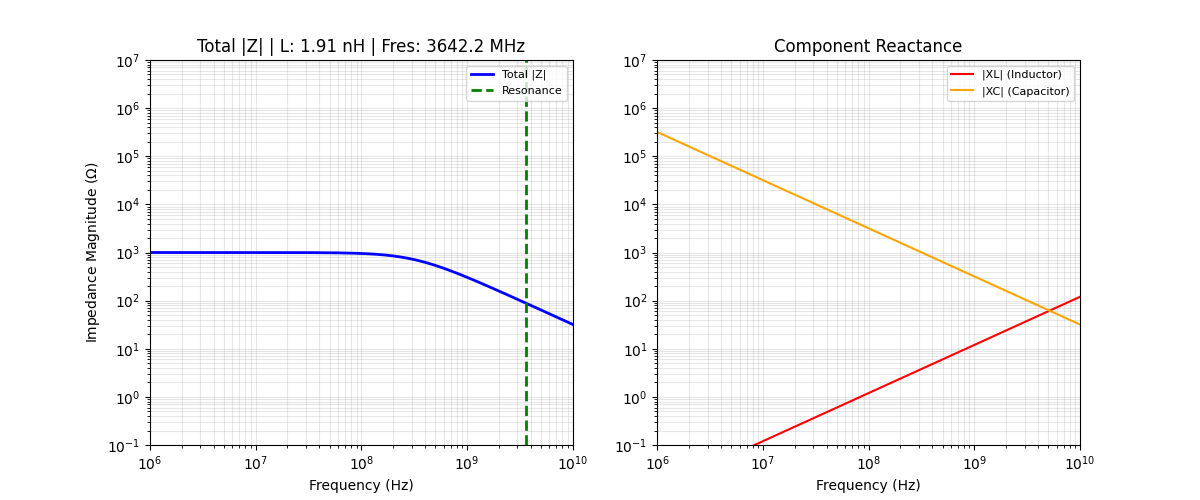

In [19]:
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

# Close any existing figures
plt.close('all')

# 1. Setup the figure with two subplots
fig, (ax, ax_comp) = plt.subplots(1, 2, figsize=(12, 5))

# Plot 1: Total Impedance
line, = ax.loglog([], [], color='blue', lw=2, label='Total |Z|')
res_line = ax.axvline(1, color='green', ls='--', lw=2, label='Resonance')
v_line = ax.axvline(1, color='gray', lw=0.5, ls='-', visible=False)
h_line = ax.axhline(1, color='gray', lw=0.5, ls='-', visible=False)
text_box = ax.text(0.05, 0.95, '', transform=ax.transAxes, verticalalignment='top', 
                    bbox=dict(boxstyle='round', facecolor='white', alpha=0.8), fontsize=8)

# Plot 2: Individual Components (|XL| and |XC|)
line_xl, = ax_comp.loglog([], [], color='red', lw=1.5, ls='-', label='|XL| (Inductor)')
line_xc, = ax_comp.loglog([], [], color='orange', lw=1.5, ls='-', label='|XC| (Capacitor)')
v_line_c = ax_comp.axvline(1, color='gray', lw=0.5, ls='-', visible=False)

# Formatting
for a in [ax, ax_comp]:
    a.grid(True, which="both", ls="-", alpha=0.3)
    a.set_xlabel('Frequency (Hz)')
    a.set_xlim(1e6, 1e10)

ax.set_ylabel(r'Impedance Magnitude $(\Omega)$')
ax_comp.set_title("Component Reactance")
ax_comp.legend(loc='upper right', fontsize=8)
ax.legend(loc='upper right', fontsize=8)

# Global data storage
freq_data = np.logspace(6, 11, 2500) 
mag_data = np.zeros_like(freq_data)
xl_data = np.zeros_like(freq_data)
xc_data = np.zeros_like(freq_data)

def update_plot(R_base, length_cm, diameter_cm, C_val_pF):
    global mag_data, xl_data, xc_data
    if diameter_cm <= 0 or C_val_pF <= 0: return
    
    # Unit Conversions
    C_val = C_val_pF * 1e-12
    omega = 2 * np.pi * freq_data
    
    # Inductance calculation
    L_uH = 0.002 * length_cm * (np.log10((4 * length_cm) / diameter_cm) - 0.75)
    L_val = L_uH * 1e-6 
    L_nH = L_val * 1e9 # For display
    
    # Impedance calculation
    xl_data = omega * L_val
    xc_data = 1 / (omega * C_val)
    
    Z_series = R_base + 1j * xl_data * 2
    Z_cap = -1j * xc_data
    Z_total = (Z_series * Z_cap) / (Z_series + Z_cap)
    mag_data = np.abs(Z_total)

    # Update Visuals
    line.set_data(freq_data, mag_data)
    line_xl.set_data(freq_data, xl_data)
    line_xc.set_data(freq_data, xc_data)
    
    f_res = 1 / (2 * np.pi * np.sqrt(2*L_val * C_val)) # I have added a factor two, because there are two L (one in each leg)
    res_line.set_xdata([f_res, f_res])
    res_line.set_ydata([0, 1]) 
    res_line.set_transform(ax.get_xaxis_transform())
    
    # Update Title with L and Fres
    ax.set_title(f"Total |Z| | L: {L_nH:.2f} nH | Fres: {f_res/1e6:.1f} MHz")
    
    # Scaling
    y_min = 1e-1
    y_max = 1e7
    ax.set_ylim(y_min, y_max)
    ax_comp.set_ylim(y_min, y_max)
    
    fig.canvas.draw_idle()

def on_mouse_move(event):
    if event.inaxes in [ax, ax_comp]:
        log_event_x = np.log10(event.xdata)
        idx = (np.abs(np.log10(freq_data) - log_event_x)).argmin()
        
        x_hz, y = freq_data[idx], mag_data[idx]
        
        v_line.set_xdata([x_hz, x_hz])
        v_line_c.set_xdata([x_hz, x_hz])
        h_line.set_ydata([y, y])
        
        v_line.set_visible(True)
        v_line_c.set_visible(True)
        h_line.set_visible(True)
        
        text_box.set_text(f'Freq: {x_hz/1e6:.1f} MHz\n|Z|: {y:.1f} Ω\n|XL|: {xl_data[idx]:.1f} Ω\n|XC|: {xc_data[idx]:.1f} Ω')
        fig.canvas.draw_idle()

fig.canvas.mpl_connect('motion_notify_event', on_mouse_move)

# Define Sliders individually
R_base_s = widgets.FloatSlider(value=1000, min=10, max=10000, step=10, description='Res (Ω)')
length_s = widgets.FloatSlider(value=1.27, min=0.1, max=10.0, step=0.1, description='Len (cm)')
diam_s = widgets.FloatSlider(value=0.16, min=0.01, max=1.0, step=0.01, description='Diam (cm)')
C_val_s = widgets.FloatSlider(value=0.5, min=0.1, max=10.0, step=0.1, description='Cap (pF)')

# Arrange sliders in a Horizontal Box
ui = widgets.HBox([R_base_s, length_s, diam_s, C_val_s])

out = widgets.interactive_output(update_plot, {
    'R_base': R_base_s, 
    'length_cm': length_s, 
    'diameter_cm': diam_s, 
    'C_val_pF': C_val_s
})

display(ui, out)
plt.show()

# 3. Capacitor 

Capacitive Reactance ($X_C$) is the opposition to alternating current caused by a capacitor's ability to store charge. It is calculated as:

$$
X_C = \frac{1}{2\pi f C}
$$

As frequency ($f$) increases, the reactance decreases linearly on a log-log scale. On the other hand, the Equivalent Series Resistance (ESR) represents the losses within the capacitor, including lead resistance, dielectric losses, and plate resistance. It acts as a floor for the total impedance.

The combination of the reactive and resistive parts:

$$
|Z| = \sqrt{ESR^2 + X_C^2}
$$

- At low frequencies, $X_C$ dominates.
- At high frequencies, ESR dominates.

Then, the  **Quality Factor ($Q$)** indicates the efficiency of the capacitor. A higher $Q$ means lower energy loss.

$$
Q = \frac{X_C}{ESR}
$$


Output()

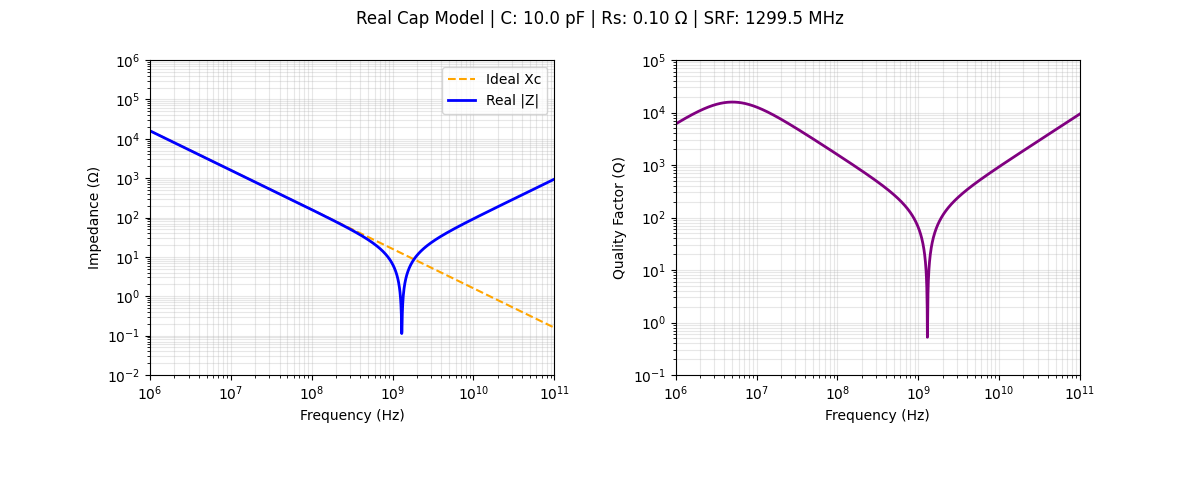

In [23]:
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets

plt.close('all')

# 1. Setup Figure
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
plt.subplots_adjust(wspace=0.3, bottom=0.25)

# Subplot 1: Impedance
line_ideal, = ax1.loglog([], [], color='orange', ls='--', lw=1.5, label='Ideal Xc')
line_total, = ax1.loglog([], [], color='blue', lw=2, label='Real |Z|')
v_line1 = ax1.axvline(1, color='gray', lw=0.5, ls='-', visible=False)
ax1.set_xlabel("Frequency (Hz)")
ax1.set_ylabel("Impedance (Ω)")
ax1.grid(True, which="both", ls="-", alpha=0.3)
ax1.legend()

# Subplot 2: Q Factor (Simplified: Xc / Rs)
line_q, = ax2.loglog([], [], color='purple', lw=2, label='Q = |Xc| / Rs')
v_line2 = ax2.axvline(1, color='gray', lw=0.5, ls='-', visible=False)
ax2.set_xlabel("Frequency (Hz)")
ax2.set_ylabel("Quality Factor (Q)")
ax2.grid(True, which="both", ls="-", alpha=0.3)
ax2.legend()

# Floating text box
text_box = fig.text(0.5, 0.02, '', ha='center', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

freq_data = np.logspace(5, 11, 2500) 
mag_data = np.zeros_like(freq_data)
ideal_xc = np.zeros_like(freq_data)
q_data = np.zeros_like(freq_data)

def update_cap(C_pF, Rs_ohms):
    global mag_data, ideal_xc, q_data
    if C_pF <= 0 or Rs_ohms <= 0: return
    
    # Fixed Parasitics
    L_fixed = 1.5e-9  
    Rp_fixed = 100e6  
    
    C = C_pF * 1e-12
    omega = 2 * np.pi * freq_data
    
    # Physics calculations
    ideal_xc = 1 / (omega * C)
    
    # Total Impedance calculation
    Z_p = 1 / ( (1/Rp_fixed) + 1j*omega*C )
    Z_total = Rs_ohms + 1j*omega*L_fixed + Z_p
    mag_data = np.abs(Z_total)
    
    # --- Simplified Q Factor Relation ---
    # Q = |Xc| / ESR
    q_data = ideal_xc / Rs_ohms

    # Update Visuals
    line_ideal.set_data(freq_data, ideal_xc)
    line_total.set_data(freq_data, mag_data)
    line_q.set_data(freq_data, q_data)
    
    f_srf = 1 / (2 * np.pi * np.sqrt(L_fixed * C))
    
    ax1.set_xlim(1e6, 1e11)
    ax1.set_ylim(min(Rs_ohms*0.5, 0.01), 1e6)
    ax2.set_xlim(1e6, 1e11)
    ax2.set_ylim(0.1, 1e6)
    
    fig.suptitle(f"Capacitor Q Analysis | C: {C_pF:.1f} pF | Rs (ESR): {Rs_ohms:.2f} Ω", fontsize=12)
    fig.canvas.draw_idle()

def on_mouse_move(event):
    if event.inaxes in [ax1, ax2]:
        idx = (np.abs(np.log10(freq_data) - np.log10(event.xdata))).argmin()
        f_hz = freq_data[idx]
        z, q, xc = mag_data[idx], q_data[idx], ideal_xc[idx]
        
        v_line1.set_xdata([f_hz, f_hz]); v_line1.set_visible(True)
        v_line2.set_xdata([f_hz, f_hz]); v_line2.set_visible(True)
        
        text_box.set_text(f'Freq: {f_hz/1e6:.1f} MHz | Xc: {xc:.2f} Ω | ESR: {Rs_slider.value:.2f} Ω | Q: {q:.1f}')
        fig.canvas.draw_idle()

fig.canvas.mpl_connect('motion_notify_event', on_mouse_move)

C_slider = widgets.FloatSlider(value=10.0, min=0.5, max=100.0, step=0.5, description='C (pF)')
Rs_slider = widgets.FloatSlider(value=0.1, min=0.01, max=2.0, step=0.01, description='ESR (Ω)')

ui = widgets.HBox([C_slider, Rs_slider])
out = widgets.interactive_output(update_cap, {'C_pF': C_slider, 'Rs_ohms': Rs_slider})

display(ui, out)
plt.show()

# 4. Inductor

The inductive reactance ($X_L$) is the opposition to alternating current due to the inductor's magnetic field. It increases as frequency ($f$) goes up:

$$
X_L = 2\pi f L
$$

The **Series Resistance ($R_s$)** is typically the DC Resistance (DCR) of the wire windings. 

When considering the parasitic **capacitance** ($C_d$) in parallel with the combination of **resistance** ($R_s$) and **inductance** ($L$), the total impedance ($|Z|$) of the inductor can be expressed as:

$$
|Z| = \frac{\sqrt{R_s^2 + (X_L - X_C)^2}}{1 + \left( \frac{X_C}{R_s} \right)^2}
$$

Where:
- **$ X_C $**: The capacitive reactance of the parasitic capacitor ($C_d$) given by $X_C = \frac{1}{2 \pi f C_d}$

- **At very low frequencies**, the impedance remains **flat** and equal to the **resistance** $R_s$.
- **At high frequencies**, the impedance follows the **inductive reactance** $X_L$, but eventually, the capacitive reactance $X_C$ becomes dominant, and the impedance decreases.

The simplified **quality factor (Q)** represents the ratio of energy stored to energy lost. For an inductor, it is given by:

$$
Q = \frac{X_L}{R_s}
$$

Since $X_L$ grows with frequency, the **Q factor** increases as frequency rises, but at higher frequencies, parasitic capacitance  $C_d$ starts to limit the increase in the Q factor.

Output()

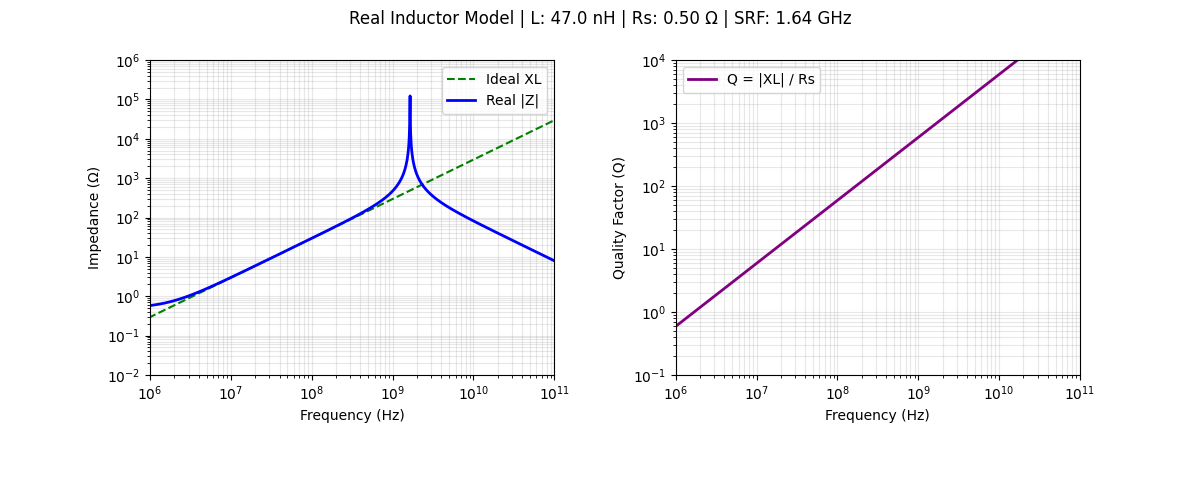

In [25]:
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets

plt.close('all')

# 1. Setup Figure with side-by-side subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
plt.subplots_adjust(wspace=0.3, bottom=0.25)

# Subplot 1: Impedance (Left)
line_xl, = ax1.loglog([], [], color='green', ls='--', lw=1.5, label='Ideal XL')
line_total, = ax1.loglog([], [], color='blue', lw=2, label='Real |Z|')
v_line1 = ax1.axvline(1, color='gray', lw=0.5, ls='-', visible=False)
ax1.set_xlabel("Frequency (Hz)")
ax1.set_ylabel("Impedance (Ω)")
ax1.grid(True, which="both", ls="-", alpha=0.3)
ax1.legend()

# Subplot 2: Q Factor (Right)
line_q, = ax2.loglog([], [], color='purple', lw=2, label='Q = |XL| / Rs')
v_line2 = ax2.axvline(1, color='gray', lw=0.5, ls='-', visible=False)
ax2.set_xlabel("Frequency (Hz)")
ax2.set_ylabel("Quality Factor (Q)")
ax2.grid(True, which="both", ls="-", alpha=0.3)
ax2.legend()

# Floating text box
text_box = fig.text(0.5, 0.02, '', ha='center', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

# Global data storage
freq_data = np.logspace(5, 11, 2500) 
mag_data = np.zeros_like(freq_data)
xl_ideal = np.zeros_like(freq_data)
q_data = np.zeros_like(freq_data)

def update_ind(L_nH, Rs_ohms):
    global mag_data, xl_ideal, q_data
    if L_nH <= 0 or Rs_ohms <= 0: return
    
    # Predefined Parasitic Capacitance (Typical for RF SMD Inductors)
    Cp_fixed = 0.2e-12  # 0.2 pF
    
    L = L_nH * 1e-9
    omega = 2 * np.pi * freq_data
    
    # Physics calculations
    xl_ideal = omega * L
    
    # 1. Series branch: Z_s = Rs + j*omega*L
    Z_s = Rs_ohms + 1j * xl_ideal
    
    # 2. Parallel branch: Z_cp = 1 / (j*omega*Cp)
    Z_cp = 1 / (1j * omega * Cp_fixed)
    
    # 3. Total Impedance: (Z_s * Z_cp) / (Z_s + Z_cp)
    Z_total = (Z_s * Z_cp) / (Z_s + Z_cp)
    mag_data = np.abs(Z_total)
    
    # Q Factor based on relationship between XL and Rs
    q_data = xl_ideal / Rs_ohms 

    # Update Visuals
    line_xl.set_data(freq_data, xl_ideal)
    line_total.set_data(freq_data, mag_data)
    line_q.set_data(freq_data, q_data)
    
    # Calculate Self-Resonant Frequency (SRF)
    f_srf = 1 / (2 * np.pi * np.sqrt(L * Cp_fixed))
    
    ax1.set_xlim(1e6, 1e11)
    ax1.set_ylim(0.01, 1e6)
    ax2.set_xlim(1e6, 1e11)
    ax2.set_ylim(0.1, 1e4)
    
    fig.suptitle(f"Real Inductor Model | L: {L_nH:.1f} nH | Rs: {Rs_ohms:.2f} Ω | SRF: {f_srf/1e9:.2f} GHz", fontsize=12)
    fig.canvas.draw_idle()

def on_mouse_move(event):
    if event.inaxes in [ax1, ax2]:
        idx = (np.abs(np.log10(freq_data) - np.log10(event.xdata))).argmin()
        f_hz = freq_data[idx]
        z, q, xl = mag_data[idx], q_data[idx], xl_ideal[idx]
        
        v_line1.set_xdata([f_hz, f_hz]); v_line1.set_visible(True)
        v_line2.set_xdata([f_hz, f_hz]); v_line2.set_visible(True)
        
        text_box.set_text(f'Freq: {f_hz/1e6:.1f} MHz | Ideal XL: {xl:.2f} Ω | Total Z: {z:.2f} Ω | Q: {q:.1f}')
        fig.canvas.draw_idle()

fig.canvas.mpl_connect('motion_notify_event', on_mouse_move)

# Sliders
L_slider = widgets.FloatSlider(value=47.0, min=1.0, max=500.0, step=1.0, description='L (nH)')
Rs_slider = widgets.FloatSlider(value=0.5, min=0.01, max=10.0, step=0.01, description='Rs (Ω)')

ui = widgets.HBox([L_slider, Rs_slider])
out = widgets.interactive_output(update_ind, {'L_nH': L_slider, 'Rs_ohms': Rs_slider})

display(ui, out)
plt.show()